In [1]:
!python utils.py
%load_ext autoreload
%autoreload 2

# Data Description

In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')


In [3]:
heart_data = pd.read_csv('heart.csv')

In [4]:
heart_data.sample(20)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
121,59,1,0,138,271,0,0,182,0,0.0,2,0,2,1
154,39,0,2,138,220,0,1,152,0,0.0,1,0,2,1
282,59,1,2,126,218,1,1,134,0,2.2,1,1,1,0
74,43,0,2,122,213,0,1,165,0,0.2,1,0,2,1
24,40,1,3,140,199,0,1,178,1,1.4,2,0,3,1
84,42,0,0,102,265,0,0,122,0,0.6,1,0,2,1
201,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
105,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
130,54,0,2,160,201,0,1,163,0,0.0,2,1,2,1
81,45,1,1,128,308,0,0,170,0,0.0,2,0,2,1


# 1. EDA  

In [5]:
heart_data.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [6]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
heart_data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


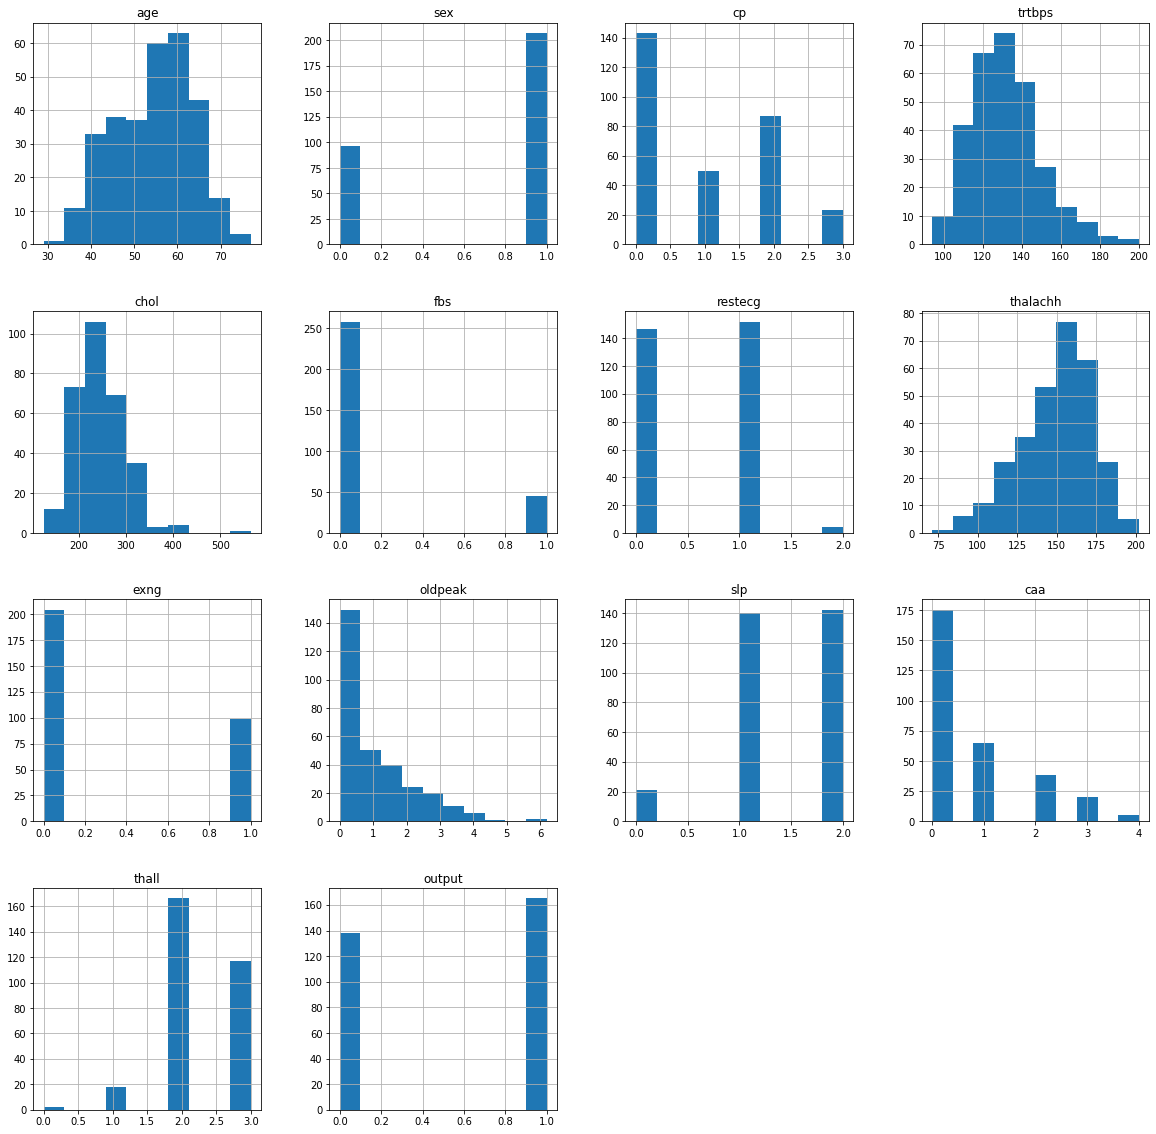

In [8]:
heart_data.hist(figsize=(20,20));

In [9]:
heart_data[heart_data['output']==0].describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.0
mean,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478,0.0
std,7.962082,0.380416,0.905920,18.729944,49.454614,0.367401,0.541321,22.598782,0.499232,1.300340,0.561324,1.043460,0.684762,0.0
min,35.000000,0.000000,0.000000,100.000000,131.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,52.000000,1.000000,0.000000,120.000000,217.250000,0.000000,0.000000,125.000000,0.000000,0.600000,1.000000,0.000000,2.000000,0.0
50%,58.000000,1.000000,0.000000,130.000000,249.000000,0.000000,0.000000,142.000000,1.000000,1.400000,1.000000,1.000000,3.000000,0.0
75%,62.000000,1.000000,0.000000,144.750000,283.000000,0.000000,1.000000,156.000000,1.000000,2.500000,1.750000,2.000000,3.000000,0.0
max,77.000000,1.000000,3.000000,200.000000,409.000000,1.000000,2.000000,195.000000,1.000000,6.200000,2.000000,4.000000,3.000000,0.0


In [10]:
heart_data[heart_data['output']==1].describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.0
mean,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212,1.0
std,9.550651,0.497444,0.952222,16.169613,53.552872,0.347412,0.504818,19.174276,0.347412,0.780683,0.593635,0.848894,0.465752,0.0
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,96.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,44.000000,0.000000,1.000000,120.000000,208.000000,0.000000,0.000000,149.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.0
50%,52.000000,1.000000,2.000000,130.000000,234.000000,0.000000,1.000000,161.000000,0.000000,0.200000,2.000000,0.000000,2.000000,1.0
75%,59.000000,1.000000,2.000000,140.000000,267.000000,0.000000,1.000000,172.000000,0.000000,1.000000,2.000000,0.000000,2.000000,1.0
max,76.000000,1.000000,3.000000,180.000000,564.000000,1.000000,2.000000,202.000000,1.000000,4.200000,2.000000,4.000000,3.000000,1.0


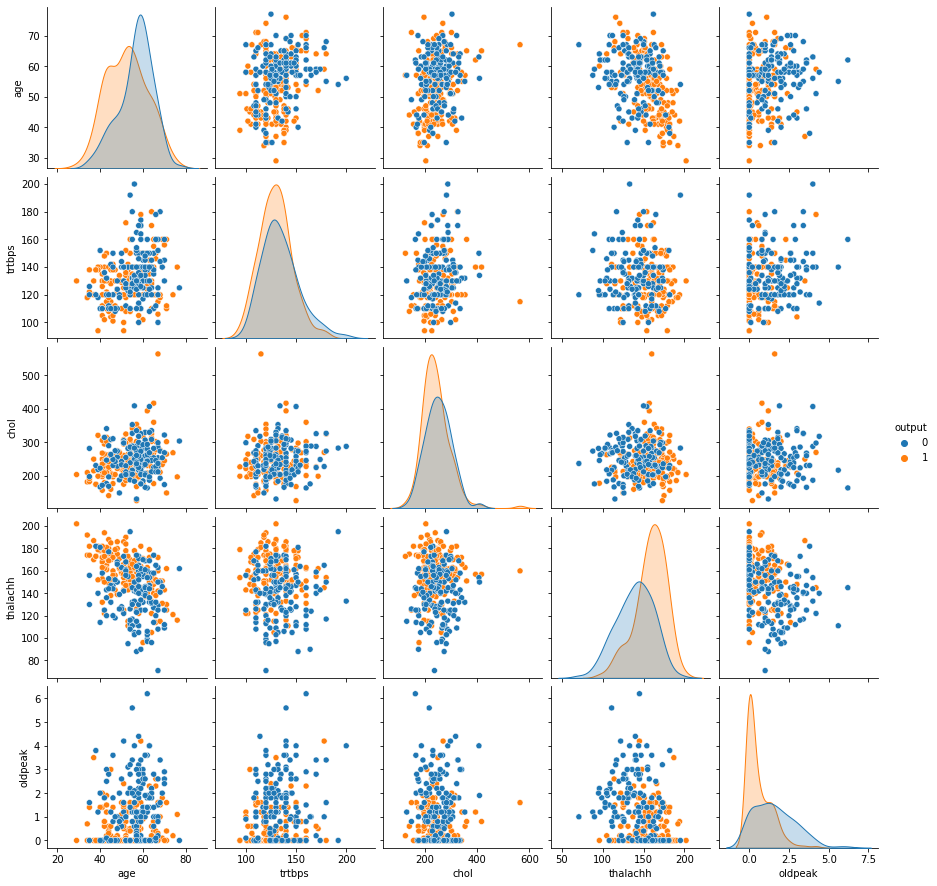

In [11]:
sns.pairplot(heart_data[['age','trtbps', 'chol','thalachh','oldpeak','output']], hue='output')
plt.show()

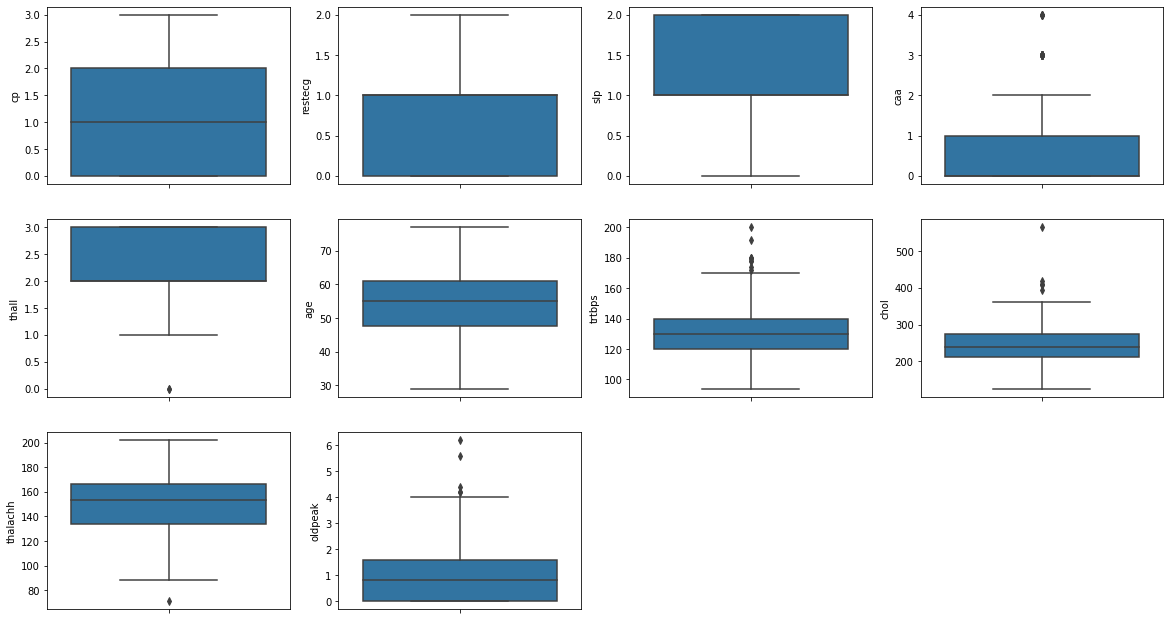

In [12]:
from utils import plot_boxplot
features = ['cp','restecg', 'slp',
                'caa', 'thall',
                'age', 'trtbps',
                'chol', 'thalachh', 'oldpeak']
plot_boxplot(heart_data, features)

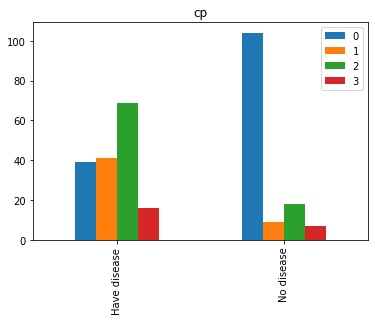

In [13]:
from utils import histogram_plot
histogram_plot(heart_data, "output", "cp")

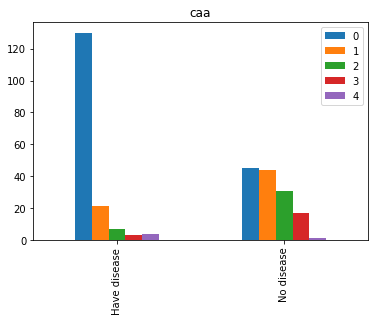

In [14]:
histogram_plot(heart_data, "output", "caa")

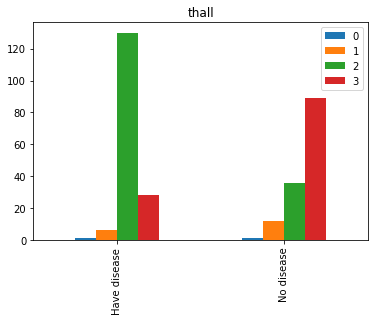

In [15]:
histogram_plot(heart_data, "output", "thall")

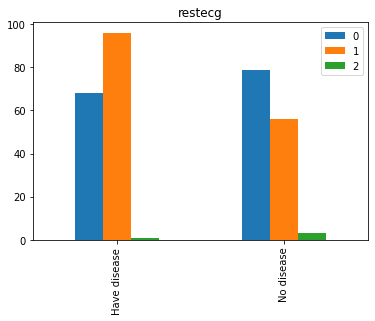

In [16]:
histogram_plot(heart_data, "output", "restecg")

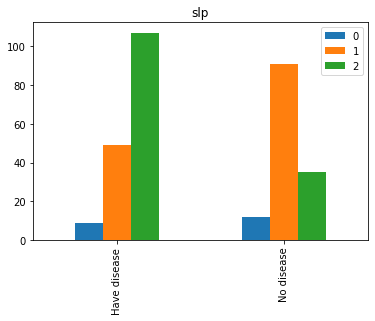

In [17]:
histogram_plot(heart_data, "output", "slp")

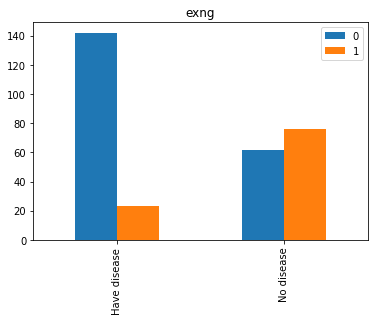

In [18]:
histogram_plot(heart_data, "output", "exng")

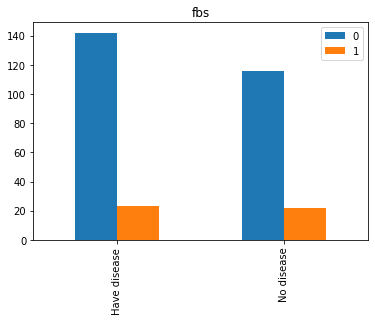

In [19]:
histogram_plot(heart_data, "output", "fbs")

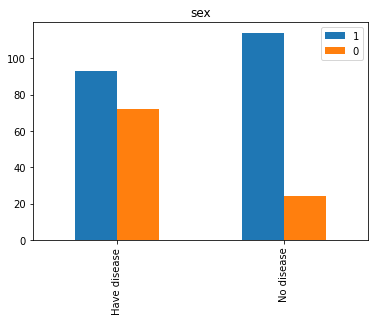

In [20]:
histogram_plot(heart_data, "output", "sex")

In [21]:
from utils import numerical_data_analysis

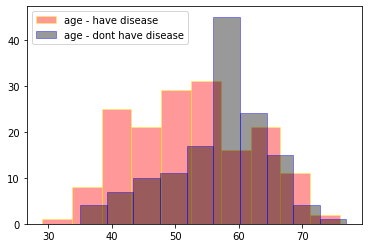

In [22]:
numerical_data_analysis(heart_data, "age")

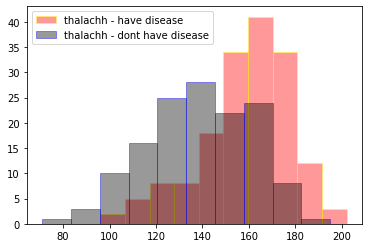

In [23]:
numerical_data_analysis(heart_data, "thalachh")

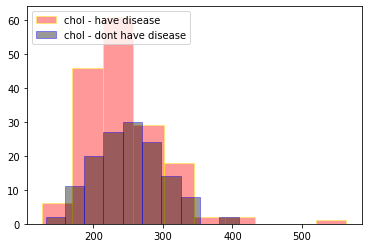

In [24]:
numerical_data_analysis(heart_data, "chol")

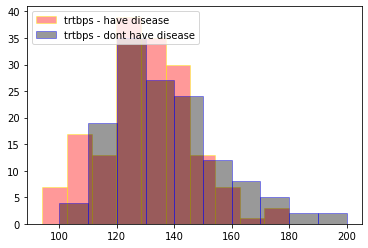

In [25]:
numerical_data_analysis(heart_data, "trtbps")

# 2) Feature Engineering

From the box plots, We see that 
outliers are present in different features like trtbps, chol, thalachh, oldpeak, caa, thall.
Removing Outlies Using Z score

In [26]:
from utils import remove_outliers
outlierfree_data = remove_outliers(heart_data)

In [27]:
outlierfree_data.tail()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


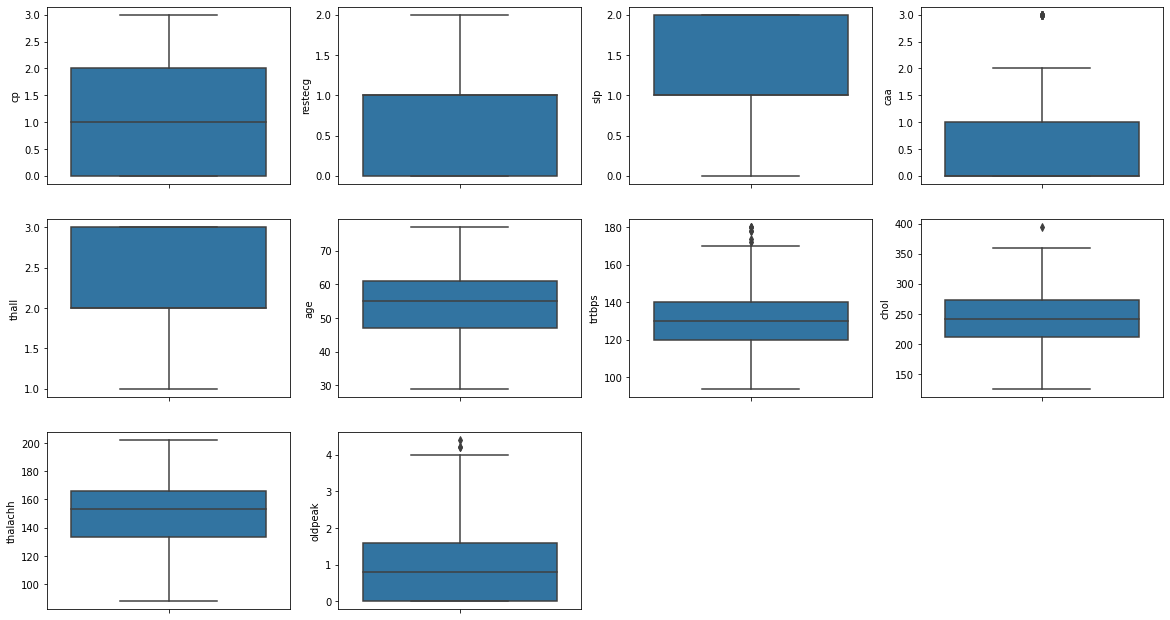

In [28]:
plot_boxplot(outlierfree_data, features)

In [29]:
##Discretization

In [30]:
from utils import getdiscretization
bins = [25, 40, 60, 79]
outlierfree_data = getdiscretization(outlierfree_data, 'age', bins)

In [31]:
corr = outlierfree_data.corr().sort_values(by='output',ascending=False)
corr['output']

output      1.000000
thalachh    0.431519
cp          0.408570
slp         0.323948
restecg     0.130079
fbs        -0.011438
chol       -0.099821
trtbps     -0.119281
age        -0.172089
sex        -0.302926
thall      -0.354579
oldpeak    -0.424443
exng       -0.429082
caa        -0.463258
Name: output, dtype: float64

# Drop the column with correlation nearly equal to 0 

In [32]:
outlierfree_data = outlierfree_data.drop(['fbs'],axis = 1)

In [33]:
outlierfree_data.sample(12)

,sex,cp,trtbps,chol,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,age
284,1,0,140,207,0,138,1,1.9,2,1,3,0,3
238,1,0,125,304,0,162,1,0.0,2,3,2,0,3
6,0,1,140,294,0,153,0,1.3,1,0,2,1,2
39,0,2,160,360,0,151,0,0.8,2,0,2,1,3
32,1,1,130,219,0,188,0,0.0,2,0,2,1,2
283,1,0,152,223,1,181,0,0.0,2,0,3,0,2
156,1,2,130,253,1,179,0,0.0,2,0,2,1,2
254,1,3,160,273,0,125,0,0.0,2,0,2,0,2
103,1,2,120,240,1,194,0,0.8,0,0,3,1,2
250,1,0,140,298,1,122,1,4.2,1,3,3,0,2


In [34]:
# from utils import datasplit
# train_set, test_set = datasplit(outlierfree_data, test_size  = 0.2)

In [35]:
X = outlierfree_data.drop("output", axis=1)
Y = outlierfree_data["output"]

In [36]:
x_train, x_test, y_train, y_test = train_test_split(outlierfree_data.drop("output", axis=1), 
                                                    outlierfree_data["output"],
                                                    test_size=0.2)

In [37]:
x_train.shape

(229, 12)

In [38]:
from utils import model_building
models = []
models.append(('LogisticRegression',LogisticRegression(max_iter=1000, random_state=42)))
models.append(('DicisionTree',DecisionTreeClassifier(random_state=0)))
models.append(('RandomForest',RandomForestClassifier(n_estimators=100,
                                 max_leaf_nodes=10,
                                 bootstrap=False,
                                 max_samples=100,
                                 n_jobs=-1,
                                 random_state=0)))

for name, model in models:
    train_score, val_score = model_building(model, x_train, y_train)
    print(f"{name}:        training Score  :  {(train_score):0.5f} ")
    print(f"                     validation Score: {val_score:.4f}")

LogisticRegression:        training Score  :  0.87336 
                     validation Score: 0.8435
DicisionTree:        training Score  :  1.00000 
                     validation Score: 0.6826
RandomForest:        training Score  :  0.90393 
                     validation Score: 0.7913


In [39]:
model = models[0]

In [40]:
model

('LogisticRegression', LogisticRegression(max_iter=1000, random_state=42))

In [41]:
clf = model[1]

In [42]:
clf.predict(x_test[:1])

array([1])

<AxesSubplot:>

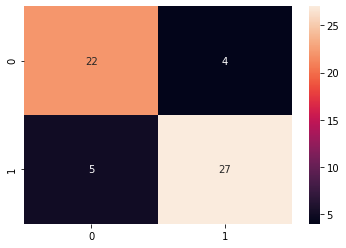

In [43]:
cf_matrix = confusion_matrix(y_test, clf.predict(x_test))
sns.heatmap(cf_matrix, annot=True)

In [44]:
from utils import model_evaluation
result = model_evaluation(clf, x_test, y_test)

In [45]:
result

{'precision_score': 0.8709677419354839,
 'recall_score': 0.84375,
 'f1_score': 0.8571428571428571}

In [46]:
import pickle
#pickle.dump(clf, open('heart_disease_detector.pickle', 'wb'))